In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import hashlib



In [4]:
def getMultiListOfObj(filename):
    data01 = open(filename, "r")
    lines = data01.readlines()
    return lines

In [5]:
def getSingleListOfObj(filename, delim):
    data01 = open(filename, "r")
    lines = data01.readlines()
    return lines[0].split(delim)

First visited -14 -119
136 -151  - 1A - Distance  287
-14 -119  - 1B - Already Visited Distance  133


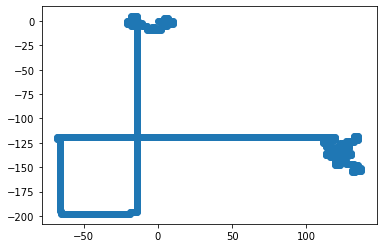

In [6]:
def task01() : 
    instructions = getSingleListOfObj("01.txt", ",")
    visted = []
    alreadyVisited = []
    x=0 
    y=0 
    facing = ["S", "W", "N", "E"]
    fIndex = 2
    
    for r in instructions : 
        if r[0] == "L":
            fIndex = ((fIndex - 1) + 4) % 4
        elif r[0] == "R":
            fIndex = ((fIndex + 1) + 4) % 4

        if facing[fIndex] == "S" : 
        
            for newY in range (int(r[1:])) :
                if (x,y-newY) not in visted :
                    visted.append((x,y-newY))
                else :
                    alreadyVisited.append((x, y-newY))

            y = y - int(r[1:])

        elif facing[fIndex] == "N" :

            for newY in range (int(r[1:])) :
                if (x,y+newY) not in visted :
                    visted.append((x,y+newY))
                else :
                    alreadyVisited.append((x,y+newY))


            y = y + int(r[1:])

        elif facing[fIndex] == "E" : 
           
            for newX in range (int(r[1:])) :
                if (x+newX,y) not in visted :
                    visted.append((x+newX,y))

                else :
                    alreadyVisited.append((x+newX,y))

            x = x + int(r[1:])


        elif facing[fIndex] == "W" : 

            for newX in range (int(r[1:])) :
                if (x-newX,y) not in visted :
                    visted.append((x-newX,y))
                else :
                    alreadyVisited.append((x-newX,y))
            x = x - int(r[1:])


    xx, yy = alreadyVisited[0]
    print("First visited", xx, yy)
    a,b = zip(*visted)
    plt.scatter(a,b)
    print(x,y," - 1A - Distance ", abs(x)+abs(y))
    print(xx,yy," - 1B - Already Visited Distance ", abs(xx)+abs(yy))

task01()

In [7]:
def task02a() :
    lines = getMultiListOfObj("02.txt")
    currentKey = 5
    code = []
    for key in lines :
        for instr in key :
            if instr == "U":
                if currentKey > 3 :
                    currentKey = currentKey - 3
            elif instr == "D":
                if currentKey < 7 :
                    currentKey = currentKey + 3
            elif instr == "L":
                if currentKey not in [1,4,7] :
                    currentKey = currentKey - 1
            elif instr == "R":
                if currentKey not in [3,6,9] :
                    currentKey = currentKey + 1
        code.append(currentKey)
        
    print(code)


def task02b() :
    lines = getMultiListOfObj("02.txt")
    currentKey = 5
    code = []
    for key in lines :
        for instr in key :
            
            if instr == "U":
                if currentKey in [6,7,8,10,11,12]  :
                    currentKey = currentKey - 4
                elif currentKey in [13]  :
                    currentKey = 11
                elif currentKey in [3]  :
                    currentKey = 1
            
            elif instr == "D":
                if currentKey in [2,3,4,6,7,8]  :
                    currentKey = currentKey + 4
                elif currentKey in [11]  :
                    currentKey = 13
                elif currentKey in [1]  :
                    currentKey = 3
            
            elif instr == "L":
                if currentKey not in [1,2,5,10,13] :
                    currentKey = currentKey - 1
            elif instr == "R":
                if currentKey not in [1,4,9,12,13] :
                    currentKey = currentKey + 1
        
        if currentKey == 10 :
            code.append("A")
        elif currentKey == 11 :
            code.append("B")
        elif currentKey == 12 :
            code.append("C")
        elif currentKey == 13 :
            code.append("D")
        else :
            code.append(currentKey)

        
    print(code)

task02a()
task02b()

[6, 5, 5, 5, 6]
['C', 'B', 7, 7, 9]


In [8]:
def validateTriang(a,b,c) :
    if ((a + b) <= c) :
        return False
    if ((a + c) <= b) :
        return False
    if ((b + c) <= a) :
        return False   
    return True

def validFromArray(arr) : 
    counter = 0 
    a = 0
    b = 0
    illegals = 0     
    legals = 0     
    for cv in arr :
        if counter == 2 :
            counter = 0
            if validateTriang(a,b,cv) :
                legals = legals + 1
            else :
                illegals = illegals + 1
        else :
            if counter == 0 :
                a = cv
            elif counter == 1 :
                b = cv
            counter = counter + 1
    return legals, illegals


def task03a() :
    lines = getMultiListOfObj("03.txt")
    illegals = 0     
    legals = 0     
    for l in lines :
        triang = l.split(",")
        if validateTriang(int(triang[0]),int(triang[1]),int(triang[2])) :
            legals = legals + 1
        else :
            illegals = illegals + 1
    print("num of legals, ", legals)
    print("num of illegals, ", illegals)

def task03b() :
    lines = getMultiListOfObj("03.txt")
    col1 = []
    col2 = []
    col3 = []
    for l in lines :
        triang = l.split(",")
        col1.append(int(triang[0]))
        col2.append(int(triang[1]))
        col3.append(int(triang[2]))
    illegals1, legals1 = validFromArray(col1)
    illegals2, legals2 = validFromArray(col2)
    illegals3, legals3 = validFromArray(col3)

    print("num of legals, ", legals1 + legals2 + legals3)
    print("num of illegals, ", illegals1 + illegals2 + illegals3)
     

task03a()
task03b()

num of legals,  862
num of illegals,  773
num of legals,  58
num of illegals,  1577


In [9]:
def rotateKey(vals, sector) :
    #print(vals)
    newKey = ""
    for v in vals :
        if v == "-" :
            cypher = "-"
        else :
            zz = ord(v)
            cypher = (zz - 97 + sector) % 26
            cypher = chr(cypher + 97)
        
        newKey = newKey + cypher

    
    if "object" in newKey :
        print("04b ",newKey, sector)
    return newKey
    
def task04() : 
    lines = getMultiListOfObj("04.txt")
    vals = []
    sectorId = ""
    colly = ""
    collect = False
    realSectors = []
    
    for key in lines :
        for k in key :    
            if collect :
                if k != "]" :
                    colly = colly + k
            else :
                if k == "[" :
                    collect = True
               
                if k.isnumeric() : 
                    sectorId = sectorId + k
                else :
                    vals.append(k)

            if k == "]" :
                collect = False
        lastVal = 1000
        realRoom = True
        lastAlpha = "a"
        
        for a in colly :
            if lastVal < vals.count(a) :
                realRoom = False
                break
            elif lastVal == vals.count(a) :
                if lastAlpha > a :
                    realRoom = False
                    break
            
            if vals.count(a) == 0 :
                realRoom = False
                break
            lastVal = vals.count(a)
            lastAlpha = a

        if realRoom :
            realSectors.append(int(sectorId))

        
        rotateKey(vals[:-2], int(sectorId))
        sectorId = ""
        colly = ""
        vals = []


    print("04a: " ,np.sum(realSectors))
    
task04()
    
    

04b  northpole-object-storage- 548
04a:  173787


In [10]:
def task05() :
    input = "ojvtpuvg"
    password = ""
    password2 = "________"
    for i in range(15017310) :
        hashMe = input + str(i)
        result = hashlib.md5(hashMe.encode())
        if str(result.hexdigest()).startswith("00000") :
            password = password + str(result.hexdigest())[5]
            if len(password) == 8 :
                break

    print("5A", password)

    for i in range(150173100) :
        hashMe = input + str(i)
        result = hashlib.md5(hashMe.encode())
        if str(result.hexdigest()).startswith("00000") :
            try :
                index = int(result.hexdigest()[5]) 
                if index < 8 and password2[index] == "_" :
                        password2 = password2[:index] + str(result.hexdigest())[6] + password2[index+1:]
                        #print(password2)

            except :
                err = 1
        if password2.count("_") == 0 :
            break
    print("5B", password2)

task05()


5A 4543c154
5B 1050cbbd


In [11]:
def most_frequent(List):
    return max(set(List), key = List.count)

def least_frequent(List):
    return min(set(List), key = List.count)

def task06() :
    lines = getMultiListOfObj("06.txt")
    col1 = []
    col2 = []
    col3 = []
    col4 = []
    col5 = []
    col6 = []
    col7 = []
    col8 = []
    for l in lines :
        col1.append(l[0])
        col2.append(l[1])
        col3.append(l[2])
        col4.append(l[3])
        col5.append(l[4])
        col6.append(l[5])
        col7.append(l[6])
        col8.append(l[7])
        
    mostCommon = most_frequent(col1) + most_frequent(col2) + most_frequent(col3) + most_frequent(col4) + most_frequent(col5) + most_frequent(col6) + most_frequent(col7) + most_frequent(col8)
    print("06a ", mostCommon)

    leastCommon = least_frequent(col1) + least_frequent(col2) + least_frequent(col3) + least_frequent(col4) + least_frequent(col5) + least_frequent(col6) + least_frequent(col7) + least_frequent(col8)
    print("06b ", leastCommon)

   

In [12]:
def is4Palin(fullString) :
    try :
        for s in range(len(fullString)) :
            if fullString[s] == fullString[s + 3]: 
                if fullString[s + 1] == fullString[s + 2] :
                    if fullString[s] != fullString[s + 1] :
                        if fullString[s] != fullString[s + 2] :
                            return True
    except :
        return False

def is3Palin(fullString) :
    abas = []
    try :
        for s in range(len(fullString)) :
            if fullString[s] == fullString[s + 2]: 
                if fullString[s] != fullString[s + 1] :
                    abas.append(fullString[s:s+3])
    except :
        return abas

def validateSSL(fullString, seed) :
    try :
        for s in range(len(fullString)) :
            if fullString[s] == seed[1] :
                if fullString[s+1] == seed[0]:
                    if fullString[s+2] == seed[1] :
                        return True
    except :
        return False

def validateTLS(listy) :
    if listy :
        for a in listy :
            if a % 2 == 0 :
                return False
        return True
    else :
        return False 

def task07() :
    lines = getMultiListOfObj("07.txt")
    validTLS = 0
    validSSL = 0
    for l in lines : 
        a = l[:-1].split("]")
        listy = []
        for c in a :
            z = c.split("[")
            if len(z) > 1 :
                listy.append(z[0])
                listy.append(z[1]) 
            else : 
                listy.append(z[0])
    
        indy = 1 
        palins = []
        abas = []
        for l in listy : 
            if is4Palin(l) :
                palins.append(indy)

            if indy % 2 == 1 :
                aba = is3Palin(l)
                if aba :
                    abas.extend(aba)
            indy = indy + 1    
        if validateTLS(palins) :
            validTLS = validTLS + 1

        indy = 1 
        for l in listy :
            if indy % 2 == 0 :
                for ssl in abas : 
                    if validateSSL(l, ssl) :
                        validSSL = validSSL + 1
                        break 
            indy = indy + 1    
        

    print("Valid TLS", validTLS)
    print("Valid SSL", validSSL)
    
       



In [13]:
def printBoard(board) :
    boardString = ""
    for i in board:
        boardString  =  boardString + ''.join(map(str, i)) + "\n"
    boardString = boardString.replace("1.0", "#")
    boardString = boardString.replace("0.0", ".")
    print(boardString)

def countPixels(board) :
    pixels = 0
    for a in board :
        for b in a :
            if b == 1 :
                pixels = pixels + 1
    return pixels

def task08() :
    lines = getMultiListOfObj("08.txt")
    height = 6
    zeors_array = np.zeros( (height, 50) )
    
    for l in lines :
        comms = l.split(" ")
        if comms[0] == "rect" :
            a,b = comms[1].split("x")
            x = int(a)
            y = int(b)
            for i in range(y) :
                for j in range(x) :
                    zeors_array[i][j] = 1
        elif comms[1] == "column" :
            print("xXX")
            colStart = comms[2][-1:]
            shifts = comms[4]
            zz = []
            for i in range(height) :
                zz.append(zeors_array[i][int(colStart)])
            
            newArray = np.roll(zz, int(shifts))
            
            print("was", zeors_array[0][int(colStart)], zeors_array[1][int(colStart)],zeors_array[2][int(colStart)], zeors_array[3][int(colStart)], zeors_array[4][int(colStart)], zeors_array[5][int(colStart)])
            
            for i in range(height) :
                zeors_array[i][int(colStart)] = newArray[i]
            
            
            print("is", newArray)

        elif comms[1] == "row" :
            row = comms[2][-1:]
            shifts = comms[4]
            zeors_array[int(row)] = np.roll(zeors_array[int(row)], int(shifts))

        
        #printBoard(zeors_array)
   
        #print("=============")        
        
    printBoard(zeors_array)
    print("lit ",countPixels(zeors_array))
            


task08()

xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 1. 0. 0. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 0. 1. 0. 0. 0.]
xXX
was 1.0 1.0 0.0 0.0 0.0 0.0
is [0. 1. 1. 0. 0. 0.]
xXX
was 1.0 1.0 0.0 0.0 0.0 0.0
is [0. 1. 1. 0. 0. 0.]
xXX
was 1.0 1.0 0.0 0.0 0.0 0.0
is [0. 1. 1. 0. 0. 0.]
xXX
was 1.0 1.0 1.0 0.0 0.0 0.0
is [0. 1. 1. 1. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 1. 0. 0. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 1. 0. 0. 0. 0.]
xXX
was 0.0 1.0 0.0 0.0 0.0 0.0
is [0. 0. 1. 0. 0. 0.]
xXX
was 0.0 1.0 0.0 0.0 0.0 0.0
is [0. 0. 1. 0. 0. 0.]
xXX
was 0.0 0.0 1.0 0.0 0.0 0.0
is [0. 0. 0. 1. 0. 0.]
xXX
was 0.0 0.0 1.0 0.0 0.0 0.0
is [0. 0. 0. 1. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 0. 1. 0. 0. 0.]
xXX
was 1.0 0.0 0.0 1.0 0.0 0.0
is [0. 1. 0. 0. 1. 0.]
xXX
was 1.0 0.0 0.0 1.0 0.0 0.0
is [0. 1. 0. 0. 1. 0.]
xXX
was 1.0 1.0 0.0 0.0 0.0 0.0
is [0. 1. 1. 0. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 0.0 0.0
is [0. 1. 0. 0. 0. 0.]
xXX
was 1.0 0.0 0.0 0.0 1.0 0.0
is [1. 0. 1. 0. 0. 0.]
xXX
was 1.

In [14]:
def task09() : 
    line = getMultiListOfObj("09b.txt")[0]
    becomesActive = -1
    active = True
    newString = ""
    for l in range(len(line)) :
        if active :
            if line[l] =="(" :
                peekAhead = 1
                while line[l+peekAhead] != ")" :
                    peekAhead = peekAhead + 1 
                compression = line[l + 1 : l + peekAhead]
                chars = int(compression.split("x")[0])
                loops = int(compression.split("x")[1])
                #print(l, line[l + peekAhead + 1: l + peekAhead + chars + 1])
                active = False
                becomesActive = l + peekAhead + chars + 1
                #print("NEXT ACTIVE, ", becomesActive)
                for z in range(loops) :
                    newString = newString + line[l + peekAhead + 1 : l + peekAhead + 1 + chars]
                    #print(line[l + peekAhead + 1 : l + peekAhead + 1 + chars])
                    #print(newString)
                    
            else :
                newString = newString + line[l]    
        if l == becomesActive :
            active = True
            newString = newString + line[l]
    #print(newString)
    print(len(newString))

task09()
    

69


In [15]:
def task10() :
    botLists = {}
    output = {}
    instructions = {}
    lines = getMultiListOfObj("10.txt")
    for line in lines :
        l = line[:-1].split(" ")
        if l[0] == "value" :
            key = l[5]
            val = l[1]
            if key not in botLists:
                botLists[key] = []
            botLists[key].append(int(val))
        else : 
            instructions[l[1]] = line[:-1]

    print(botLists)
    z = 0
    while z < 15000 :
        for a in botLists :
            if len(botLists[a]) == 2 :
                l = instructions[a].split(" ")
                #print(a, botLists[a])
                #print(instructions[a])
                if l[0] != "value" :
                    giver = l[1]
                    mini = min(botLists[giver])
                    maxi = max(botLists[giver])
                    reciever = l[6]

                    if reciever not in botLists:
                        botLists[reciever] = []
                    if reciever not in output:
                        output[reciever] = []

                    if l[5] == "bot" :
                        botLists[giver].remove(mini)
                        botLists[reciever].append(mini)
                    elif l[5] == "output" :
                        botLists[giver].remove(mini)
                        output[reciever].append(mini)

                    reciever = l[11]
                    if reciever not in botLists:
                        botLists[reciever] = []
                    if reciever not in output:
                        output[reciever] = []

                    if l[10] == "bot" :
                        botLists[giver].remove(maxi)
                        botLists[reciever].append(maxi)
                    elif l[10] == "output" :
                        botLists[giver].remove(maxi)
                        output[reciever].append(maxi)

                break
        z = z +1
        #print(z)
        #run = False
    print(output['0'])
    print(output['1'])
    print(output['2'])



            

In [16]:
def parseProgram(filename, delim):
    data01 = open(filename, "r")
    lines = data01.read().splitlines()
    ll = []
    for l in lines :
        ll.append(l.split(delim))
    return ll

def task12() :
    progr = parseProgram("12.txt"," ")
    registers = {"a" : 0 , "b" : 0,  "c": 1, "d": 0}
    pcr = 0
    count = 0
    while pcr < len(progr) :
        if progr[pcr][0] == "jnz" :
            if getRegisterOrNumValue(progr[pcr][1], registers) == 0 : 
                pcr = pcr + 1                             
            else :
                pcr = pcr + int(progr[pcr][2])
        elif progr[pcr][0] == "cpy" :
            registers[progr[pcr][2]] = getRegisterOrNumValue(progr[pcr][1], registers)
            pcr = pcr + 1         
        elif progr[pcr][0] == "inc" :
            registers[progr[pcr][1]] = registers[progr[pcr][1]] + 1
            pcr = pcr + 1         
        elif progr[pcr][0] == "dec" :
            registers[progr[pcr][1]] = registers[progr[pcr][1]] - 1
            pcr = pcr + 1         
    
        count = count + 1 
        #infite loop protection if the input is not valid.
        if count == 100000000 :
            break 

    print(count, registers)        
        

def getRegisterOrNumValue(input, registers) :
    if input.isnumeric() :
        return int(input)
    
    return int(registers[input])

task12()


27683520 {'a': 9227771, 'b': 5702887, 'c': 0, 'd': 0}


In [17]:
def isOpen(x,y, input):
    sum = (x*x) + (3*x) +  (2*x*y) + y + (y*y) + input
    binarySum = bin(sum)[2:]
    if binarySum.count("1") % 2 == 0 : 
        return True
    return False

def getNeighbours(x,y, max, fave) :
    neighbours = {}
    #EDGES

    #2 degrees
    if (x == 0 and y == 0):
        if isOpen(1, y, fave) :
            neighbours["1,0"] = 1
        if isOpen(x, 1, fave) :
            neighbours["0,1"] = 1
    elif x == max and y == max :
        if isOpen(x-1, y, fave) :
            neighbours[str(x-1) + "," + str(y)] = 1
        if isOpen(x, y-1, fave) :
            neighbours[str(x) + "," + str(y-1)] = 1
    elif x == 0 and y == max :
        if isOpen(x+1, y, fave) :
            neighbours[str(x+1) + "," + str(y)] = 1
        if isOpen(x, y-1, fave) :
            neighbours[str(x) + "," + str(y-1)] = 1

    elif x == max and y == 0 :
        if isOpen(x-1, y, fave) :
            neighbours[str(x-1) + "," + str(y)] = 1
        if isOpen(x, y+1, fave) :
            neighbours[str(x) + "," + str(y+1)] = 1

    #3=degrees

    elif x == 0 or x == max:
        if isOpen(x, y+1, fave) :
            neighbours[str(x) + "," + str(y+1)] = 1
        if isOpen(x, y-1, fave) :
            neighbours[str(x) + "," + str(y-1)] = 1
            if x == 0 :
                if isOpen(x+1, y, fave) :
                    neighbours[str(x+1) + "," + str(y)] = 1
            else :
                if isOpen(x-1, y, fave) :
                    neighbours[str(x-1) + "," + str(y)] = 1
    elif y == 0 or y == max :
        if isOpen(x+1, y, fave) :
            neighbours[str(x+1) + "," + str(y)] = 1
        if isOpen(x-1, y, fave) :
            neighbours[str(x-1) + "," + str(y)] = 1
            if y == 0 :
                if isOpen(x, y+1, fave) :
                    neighbours[str(x) + "," + str(y+1)] = 1
            else :
                if isOpen(x, y-1, fave) :
                    neighbours[str(x) + "," + str(y-1)] = 1
    #4degrees
    else : 
        if isOpen(x, y+1, fave) :
            neighbours[str(x) + "," + str(y+1)] = 1
        if isOpen(x, y-1, fave) :
            neighbours[str(x) + "," + str(y-1)] = 1
        if isOpen(x+1, y, fave) :
            neighbours[str(x+1) + "," + str(y)] = 1
        if isOpen(x-1, y, fave) :
            neighbours[str(x-1) + "," + str(y)] = 1
    return neighbours

def travel(graph, start, goal) :
    path = {}
    adj_node = {}
    queue = []
    for node in graph:
        path[node] = float("inf")
        adj_node[node] = None
        queue.append(node)
        
    path[start] = 0
    while queue:
        key_min = queue[0]
        min_val = path[key_min]
        for n in range(1, len(queue)):
            if path[queue[n]] < min_val:
                key_min = queue[n]  
                min_val = path[key_min]
        cur = key_min
        queue.remove(cur)
       # print(cur)
        
        for i in graph[cur]:
            alternate = graph[cur][i] + path[cur]
            if path[i] > alternate:
                path[i] = alternate
                adj_node[i] = cur
                
    corpath = [goal]
    while True:
        goal = adj_node[goal]
        if goal is None:
            #print("")
            break
        corpath.append(goal)

    #print(corpath)
    return len(corpath)-1


def task13() :
    puzzleInput = 1364
    graph = {}
    #puzzleInput = 10
    size = 50
    for y in range(size) :
        row = ""
        for x in range(size) :
            if isOpen(x,y,puzzleInput) :
                row = row + " ."
                graph[str(x) + "," + str(y)] = getNeighbours(x,y,size-1, puzzleInput)
            else :
                row = row + " #"
        #print(row)
    #print(graph)
    pathLeng = travel(graph, "1,1", "31,39")
    print("13A", pathLeng)

    ##B 
    reachableWithin50 = ["1,1"]
    for a in graph :
        reachable = travel(graph,"1,1",a)
        if reachable > 0 and reachable < 51 :
            reachableWithin50.append(a)

    print("13B",len(reachableWithin50))

task13()
   

13A 86
13B 127


In [80]:
def task14a() :
    #input = "abc"
    input = "qzyelonm"
    myKey = []
    for i in range(22700030) :
        hashMe = input + str(i)
        result = hashlib.md5(hashMe.encode())
        myHex = str(result.hexdigest())
        a = re.search('([a-z0-9])\\1\\1', myHex)
        if bool(a)  :
            local = i+1
            while local < i + 1000 :
                hash5 = input + str(local)
                resul5 = hashlib.md5(hash5.encode())
                myHex5 = str(resul5.hexdigest())
                if (a.group() + a.group()[0:2] in myHex5) :
                    myKey.append(i)
             #       print(i, myHex, a.group(), local, myHex5)
                    break
                local = local + 1 
        if len(myKey) == 64 :
            break

    print("14a", myKey[len(myKey)-1])
    print("14a",len(myKey))

def task14b() :
    #input = "abc"
    input = "qzyelonm"
    myBigHashList = []
    myKey = []
    preSize = 30000
    for a in range(preSize) :
        newHash = input + str(a)
        for h in range(2017) :
            res = hashlib.md5(newHash.encode())
            newHash = str(res.hexdigest())
        myBigHashList.append(newHash)

    for i in range(preSize) :
        a = re.search('([a-z0-9])\\1\\1', myBigHashList[i])
        
        if bool(a)  :
            local = i+1
            while local < i + 1000 and local < preSize :
                if (a.group() + a.group()[0:2] in myBigHashList[local]) :
                    myKey.append(i)
                    break
                local = local + 1 
        if len(myKey) == 64 :
            break

    print("14b", myKey[len(myKey)-1])
    print("14b", len(myKey))



task14a()
task14b()

14a 15168
14a 64
14b 20864
14b 64


In [99]:
#Disc #1 has 13 positions; at time=0, it is at position 11.
#Disc #2 has 5 positions; at time=0, it is at position 0.
#Disc #3 has 17 positions; at time=0, it is at position 11.
#Disc #4 has 3 positions; at time=0, it is at position 0.
#Disc #5 has 7 positions; at time=0, it is at position 2.
#Disc #6 has 19 positions; at time=0, it is at position 17.

def task15() :
    input = {"1" : [13,11], "2" : [5,0], "3" : [17,11], "4" : [3,0], "5" : [7,2], "6" : [19,17], "7" : [11,0]}


   # input = {"1" : [5,4], "2" : [2,1]}

    for i in range(100000000) :
        if (input["1"][1] + i + 1) % input["1"][0] == 0 :
            if (input["2"][1] + i  + 2 ) % input["2"][0] == 0 :
                if (input["3"][1] + i  + 3 ) % input["3"][0] == 0 :
                    if (input["4"][1] + i  + 4 ) % input["4"][0] == 0 :
                        if (input["5"][1] + i  + 5 ) % input["5"][0] == 0 :
                            if (input["6"][1] + i  + 6 ) % input["6"][0] == 0 :
                                if (input["7"][1] + i  + +7 ) % input["7"][0] == 0 :
                                    print(i ,"WOOW")
                                    break

task15()